In [41]:
import numpy as np
import pandas as pd

In [42]:
cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

df = pd.read_csv('Iris.csv')
df.columns = cols

df.head()

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


# Cleaning and Preprocessing

In [43]:
df.shape

(149, 5)

In [44]:
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [46]:
df.loc[df['sepal length']==5.0, 'sepal length'] = np.nan
df.loc[df['petal length']==1.4, 'petal length'] = np.nan
df.isna().sum()

sepal length    10
sepal width      0
petal length    11
petal width      0
class            0
dtype: int64

In [49]:
df['sepal length'].fillna(df['sepal length'].mean(), inplace=True)
df['petal length'].fillna(df['petal length'].mean(), inplace=True)
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

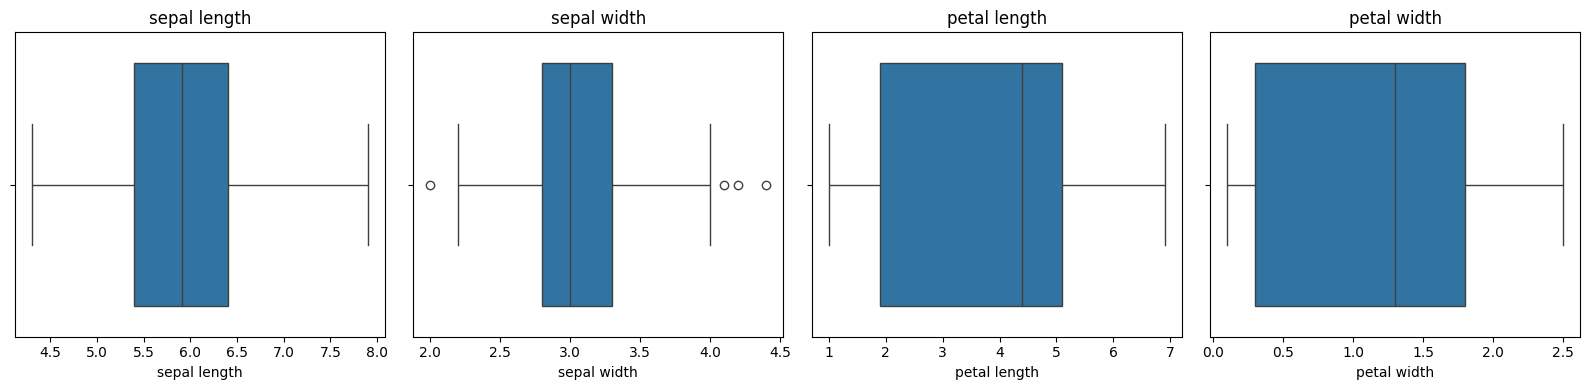

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

def visBoxplots(df):
    
    numeric_cols = df.select_dtypes(include=['number']).columns
    cols = len(numeric_cols)
    
    rows = (cols + 3) // 4
    cols = min(cols, 4)
    
    fig, axes = plt.subplots(rows, cols, figsize=(16,4*rows))
    
    if rows > 1:
        axes = axes.flatten()
        
    for i,col in enumerate(numeric_cols):
        sns.boxplot(x=df[col],ax=axes[i])
        axes[i].set_title(col)
        
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()
    
visBoxplots(df)

In [60]:
df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

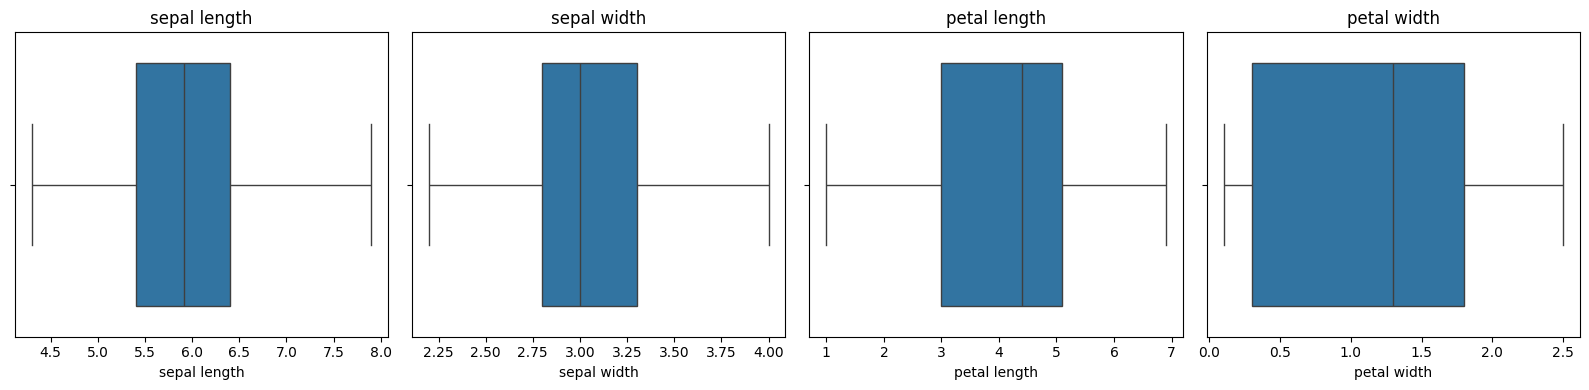

In [69]:
def rem1(df):
    numeric_cols = df.select_dtypes(include=['number'])
    zscore = np.abs((numeric_cols - numeric_cols.mean()) / numeric_cols.std())
    out = zscore > 3
    df = df[~out.any(axis=1)]
    return df

def rem2(df):
    
    df = df.select_dtypes(include=['number'])
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
            
    ndf = df[~((df < lower_threshold) | (df > upper_threshold)).any(axis=1)]
    
    return ndf

ndf = rem2(df)
df = ndf
visBoxplots(df)

# Creating subsets and merging them

In [71]:
df.head()

,sepal length,sepal width,petal length,petal width
0,4.900000,3.0,3.963768,0.2
1,4.700000,3.2,1.300000,0.2
2,4.600000,3.1,1.500000,0.2
3,5.909353,3.6,3.963768,0.2
4,5.400000,3.9,1.700000,0.4


In [73]:
df_subset1 = df[df['sepal length'] == 5.4]
df_subset1

,sepal length,sepal width,petal length,petal width
4,5.4,3.9,1.7,0.4
9,5.4,3.7,1.5,0.2
15,5.4,3.9,1.3,0.4
19,5.4,3.4,1.7,0.2
30,5.4,3.4,1.5,0.4
83,5.4,3.0,4.5,1.5


In [75]:
df_subset2 = df[df['petal length'] == 1.5]
df_subset2

,sepal length,sepal width,petal length,petal width
2,4.600000,3.1,1.5,0.2
6,5.909353,3.4,1.5,0.2
8,4.900000,3.1,1.5,0.1
9,5.400000,3.7,1.5,0.2
18,5.100000,3.8,1.5,0.3
20,5.100000,3.7,1.5,0.4
26,5.200000,3.5,1.5,0.2
30,5.400000,3.4,1.5,0.4
33,4.900000,3.1,1.5,0.1
36,4.900000,3.1,1.5,0.1


In [78]:
df_merged = pd.concat([df_subset1, df_subset2])
df_merged

,sepal length,sepal width,petal length,petal width
4,5.400000,3.9,1.7,0.4
9,5.400000,3.7,1.5,0.2
15,5.400000,3.9,1.3,0.4
19,5.400000,3.4,1.7,0.2
30,5.400000,3.4,1.5,0.4
83,5.400000,3.0,4.5,1.5
2,4.600000,3.1,1.5,0.2
6,5.909353,3.4,1.5,0.2
8,4.900000,3.1,1.5,0.1
9,5.400000,3.7,1.5,0.2


# Sort By Petal Length

In [80]:
df_sorted = df.sort_values(by=['petal length'])
df_sorted

,sepal length,sepal width,petal length,petal width
21,4.600000,3.6,1.0,0.2
12,4.300000,3.0,1.1,0.1
34,5.909353,3.2,1.2,0.2
13,5.800000,4.0,1.2,0.2
41,4.400000,3.2,1.3,0.2
...,...,...,...,...
130,7.900000,3.8,6.4,2.0
104,7.600000,3.0,6.6,2.1
121,7.700000,2.8,6.7,2.0
116,7.700000,3.8,6.7,2.2


# Transposing

In [81]:
df_transposed = df.transpose()
df_transposed

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
sepal length,4.900000,4.7,4.6,5.909353,5.4,4.600000,5.909353,4.400000,4.9,5.4,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal width,3.000000,3.2,3.1,3.600000,3.9,3.400000,3.400000,2.900000,3.1,3.7,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal length,3.963768,1.3,1.5,3.963768,1.7,3.963768,1.500000,3.963768,1.5,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal width,0.200000,0.2,0.2,0.200000,0.4,0.300000,0.200000,0.200000,0.1,0.2,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8


# Melting Data

In [82]:
df.head()

,sepal length,sepal width,petal length,petal width
0,4.900000,3.0,3.963768,0.2
1,4.700000,3.2,1.300000,0.2
2,4.600000,3.1,1.500000,0.2
3,5.909353,3.6,3.963768,0.2
4,5.400000,3.9,1.700000,0.4


In [90]:
df_melted = pd.melt(df, id_vars=['sepal length', 'sepal width'], var_name='Metrics', value_name='Value')
df_melted

,sepal length,sepal width,Metrics,Value
0,4.900000,3.0,petal length,3.963768
1,4.700000,3.2,petal length,1.300000
2,4.600000,3.1,petal length,1.500000
3,5.909353,3.6,petal length,3.963768
4,5.400000,3.9,petal length,1.700000
...,...,...,...,...
285,6.700000,3.0,petal width,2.300000
286,6.300000,2.5,petal width,1.900000
287,6.500000,3.0,petal width,2.000000
288,6.200000,3.4,petal width,2.300000


# Cast to Wide

In [88]:
df_casted = df_melted.pivot_table(index=['sepal length','sepal width'], columns='Metrics', values='Value').reset_index()
df_casted

Metrics,sepal length,sepal width,petal length,petal width
0,4.3,3.0,1.100000,0.1
1,4.4,2.9,3.963768,0.2
2,4.4,3.0,1.300000,0.2
3,4.4,3.2,1.300000,0.2
4,4.5,2.3,1.300000,0.3
...,...,...,...,...
107,7.7,2.6,6.900000,2.3
108,7.7,2.8,6.700000,2.0
109,7.7,3.0,6.100000,2.3
110,7.7,3.8,6.700000,2.2
